# 1. Cargar los datos

## Conectar con Google Drive

In [1]:
# Conectar con Google Drive: esto sirve para conectar con Google Drive y poder gestionar archivos
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

Importar librerías



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configuración de estilos
sns.set(style="whitegrid")
%matplotlib inline


ModuleNotFoundError: No module named 'seaborn'

## Cargar el Dataset

**ATENCIÓN: Debes guardar los datos en tu Drive y poner aquí debajo la ruta!**

In [ ]:
path = "/content/drive/MyDrive/Docencia/datos/WHR2023.csv" # Ruta a donde hayáis puesto los datos en vuestro Google Drive
happiness_df = pd.read_csv(path)

# Mostrar las primeras filas del dataset
print(happiness_df.head())


  Country name  Ladder score  Standard error of ladder score  upperwhisker  \
0      Finland         7.804                           0.036         7.875   
1      Denmark         7.586                           0.041         7.667   
2      Iceland         7.530                           0.049         7.625   
3       Israel         7.473                           0.032         7.535   
4  Netherlands         7.403                           0.029         7.460   

   lowerwhisker  Logged GDP per capita  Social support  \
0         7.733                 10.792           0.969   
1         7.506                 10.962           0.954   
2         7.434                 10.896           0.983   
3         7.411                 10.639           0.943   
4         7.346                 10.942           0.930   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                   71.150                         0.961      -0.019   
1                   71.250            

Para que esto funcione debo tener el archivo en la ruta


# 2 Exploración y Limpieza de Datos


In [ ]:
# Verificar la estructura del dataset
print(happiness_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

Eliminamos las columnas que no nos interesan


In [ ]:
happiness_df.columns

Index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [ ]:
# Renombrar columnas para mayor claridad
happiness_df = happiness_df.rename(columns={
    'Country name': 'Country',
    'Ladder score': 'Score',
    'Logged GDP per capita': 'Logged_GDP_per_capita',
    'Social support': 'Social_support',
    'Healthy life expectancy': 'Healthy_life_expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Corruption'
})

# Nos quedamos solo con las columnas que nos interesan
happiness_df = happiness_df[["Country", "Score", "Logged_GDP_per_capita",
                             "Social_support", "Healthy_life_expectancy",
                             "Freedom", "Generosity", "Corruption"]].copy()

In [ ]:
happiness_df.head()

,Country,Score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom,Generosity,Corruption
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379


Vemos si hay valores nulos

In [ ]:
# Verificar valores nulos
print(happiness_df.isnull().sum())

Country                    0
Score                      0
Logged_GDP_per_capita      0
Social_support             0
Healthy_life_expectancy    1
Freedom                    0
Generosity                 0
Corruption                 0
dtype: int64


Hay algún valor nulo, así que lo eliminamos

In [ ]:
# Eliminar filas con valores nulos
happiness_df = happiness_df.dropna()

In [ ]:
# Mostrar las primeras filas después de la limpieza
print(happiness_df.head())

       Country  Score  Logged_GDP_per_capita  Social_support  \
0      Finland  7.804                 10.792           0.969   
1      Denmark  7.586                 10.962           0.954   
2      Iceland  7.530                 10.896           0.983   
3       Israel  7.473                 10.639           0.943   
4  Netherlands  7.403                 10.942           0.930   

   Healthy_life_expectancy  Freedom  Generosity  Corruption  
0                   71.150    0.961      -0.019       0.182  
1                   71.250    0.934       0.134       0.196  
2                   72.050    0.936       0.211       0.668  
3                   72.697    0.809      -0.023       0.708  
4                   71.550    0.887       0.213       0.379  


Los valores de las variables `Healthy_life_expectancy` y `Logged_GDP_per_capita` son muy grandes comparados con los de otras variables, así que las normalizamos para que estén entre 0 y 1

In [ ]:
# Normalizar Healthy_life_expectancy y Logged_GDP_per_capita para que estén entre 0 y 1
happiness_df["normalized_Healthy_life_expectancy"] = (happiness_df["Healthy_life_expectancy"] - happiness_df["Healthy_life_expectancy"].min()) / (happiness_df["Healthy_life_expectancy"].max() - happiness_df["Healthy_life_expectancy"].min())
happiness_df["normalized_logged_GDP_per_capita"] = (happiness_df["Logged_GDP_per_capita"] - happiness_df["Logged_GDP_per_capita"].min()) / (happiness_df["Logged_GDP_per_capita"].max() - happiness_df["Logged_GDP_per_capita"].min())



In [ ]:
happiness_df.to_csv("/content/WHR2023_clean.csv",
                    header=True, index=False)

# 3. Visualizaciones de ejemplo

## Visualización del Contexto: Mapa Mundial de Felicidad

In [ ]:
# Crear un mapa mundial interactivo utilizando Plotly
fig = px.choropleth(
    happiness_df,
    locations="Country",
    locationmode='country names',
    color="Score",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Mapa Mundial de Felicidad (World Happiness Report)'
)

fig.show()


## Visualización de la Resolución: Proyección de Mejora de Felicidad

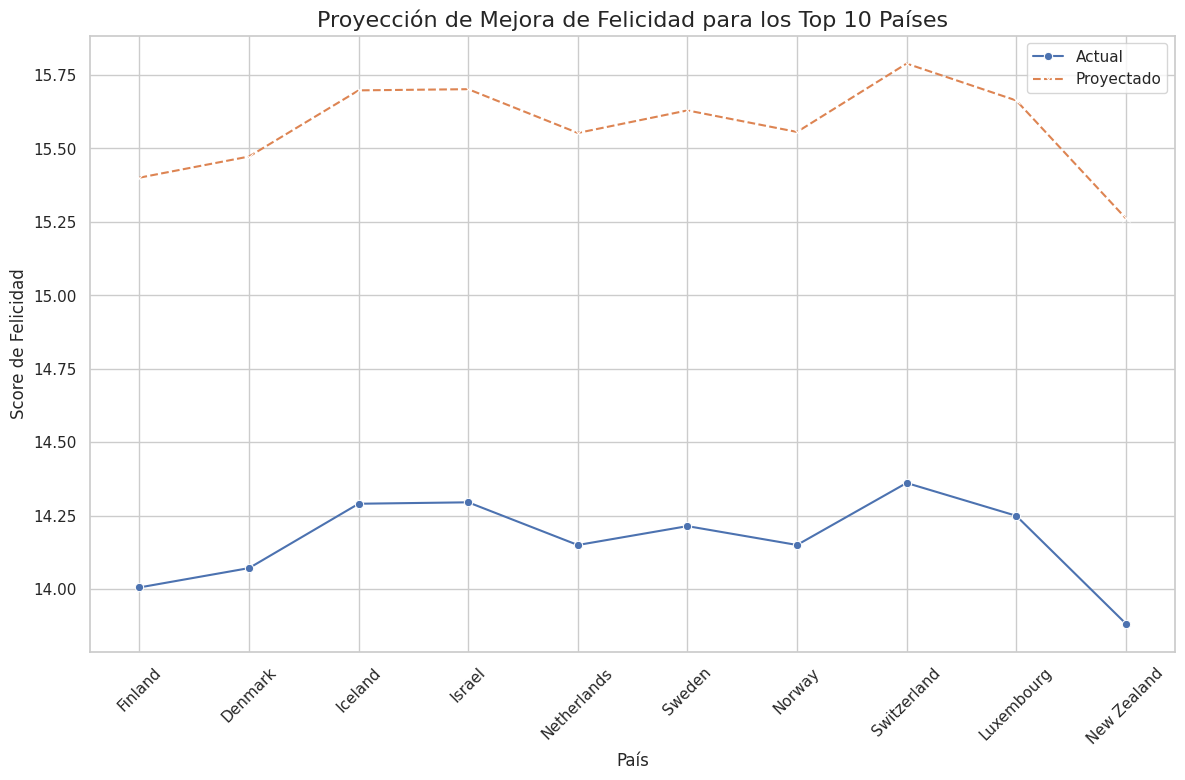

In [ ]:
# Supongamos que la implementación de políticas mejora ciertos factores en un 10%
happiness_df['normalized_logged_GDP_per_capita_proj'] = happiness_df['normalized_logged_GDP_per_capita'] * 1.10
happiness_df['Social_support_proj'] = happiness_df['Social_support'] * 1.10
happiness_df['normalized_Healthy_life_expectancy_proj'] = happiness_df['normalized_Healthy_life_expectancy'] * 1.10
happiness_df['Freedom_proj'] = happiness_df['Freedom'] * 1.10
happiness_df['Generosity_proj'] = happiness_df['Generosity'] * 1.10
happiness_df['Corruption_proj'] = happiness_df['Corruption'] * 0.90  # Reducir corrupción

# Recalcular el Score proyectado usando un modelo simplificado (ponderaciones iguales)
happiness_df['Score_proj'] = (
    happiness_df['normalized_logged_GDP_per_capita_proj'] +
    happiness_df['Social_support_proj'] +
    happiness_df['normalized_Healthy_life_expectancy_proj'] +
    happiness_df['Freedom_proj'] +
    happiness_df['Generosity_proj'] +
    happiness_df['Corruption_proj']
) / 6

# Recalcular el Score original con el mismo modelo simplificado (ponderaciones iguales)
happiness_df['Score_recalculado'] = (
    happiness_df['normalized_logged_GDP_per_capita'] +
    happiness_df['Social_support'] +
    happiness_df['normalized_Healthy_life_expectancy'] +
    happiness_df['Freedom'] +
    happiness_df['Generosity'] +
    happiness_df['Corruption']
) / 6

# Crear un gráfico de líneas para comparar los Scores actuales y proyectados
top_10 = happiness_df.sort_values('Score', ascending=False).head(10)

plt.figure(figsize=(14,8))
sns.lineplot(data=top_10, x='Country', y='Score_recalculado', marker='o', label='Actual')
sns.lineplot(data=top_10, x='Country', y='Score_proj', marker='x', linestyle='--', label='Proyectado')
plt.title('Proyección de Mejora de Felicidad para los Top 10 Países', fontsize=16)
plt.ylabel('Score de Felicidad')
plt.xlabel('País')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## Visualización de ejemplo: Heatmap de Correlaciones

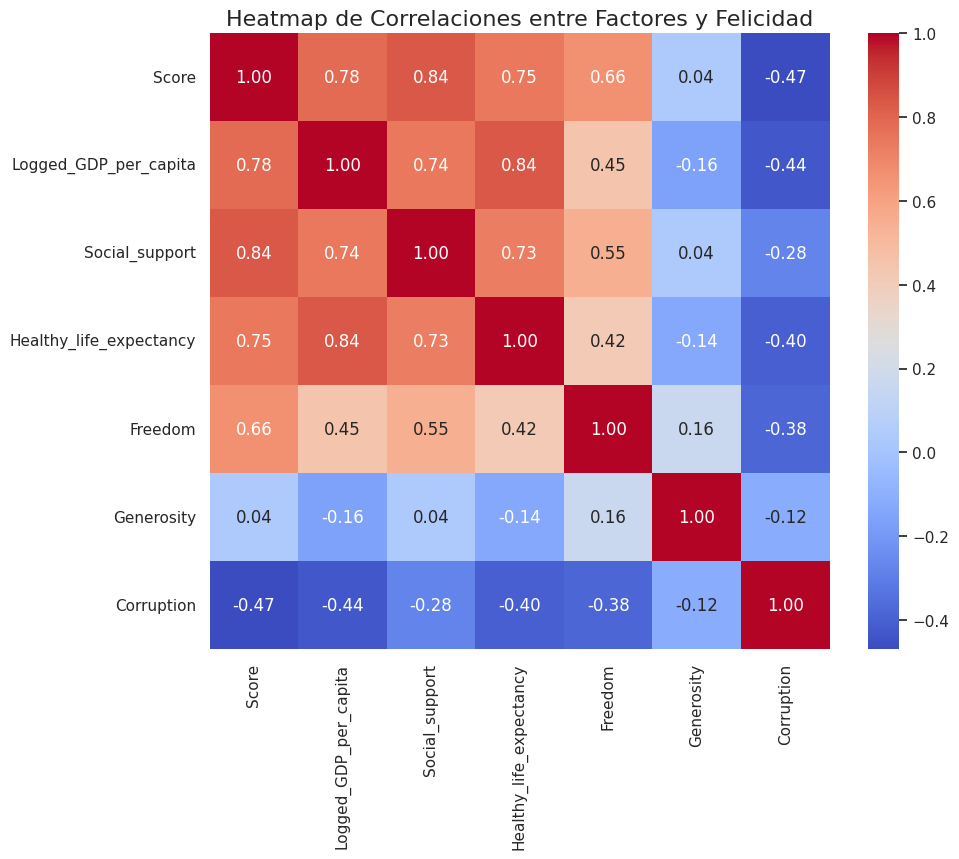

In [ ]:
# Calcular la matriz de correlación
corr = happiness_df[['Score', 'Logged_GDP_per_capita', 'Social_support',
                     'Healthy_life_expectancy', 'Freedom', 'Generosity',
                     'Corruption']].corr()

# Crear el heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlaciones entre Factores y Felicidad', fontsize=16)
plt.show()




Si observamos la primera fila, el PIB, soporte social, esperanza de vida saludable y libertad están positivamente correlacionadas con el score de felicidad. Y la percepción de la corrupción está negativamente correlacionada

## Visualización de ejemplo: dos variables con los datos anómalos señalados

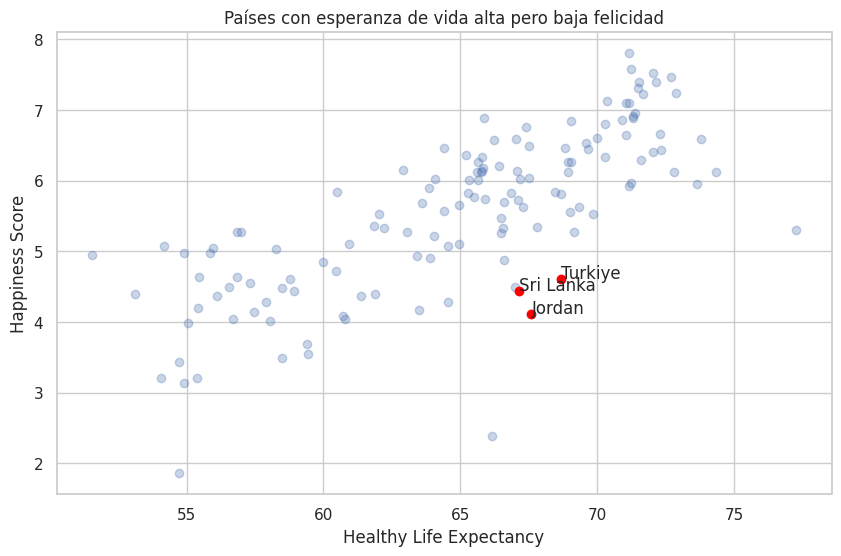

In [ ]:

# Conflict Visualization
conflict_countries = happiness_df[(happiness_df['Healthy_life_expectancy'] > happiness_df['Healthy_life_expectancy'].quantile(0.6)) &
                        (happiness_df['Score'] < happiness_df['Score'].quantile(0.25))]

# Plot
plt.figure(figsize=(10,6))
plt.scatter(happiness_df['Healthy_life_expectancy'], happiness_df['Score'], alpha=0.3)
plt.scatter(conflict_countries['Healthy_life_expectancy'], conflict_countries['Score'],
            color='red')

# Señalar los datos anómalos
for idx, row in conflict_countries.iterrows():
    plt.text(row['Healthy_life_expectancy'], row['Score'], row['Country'])
plt.title('Países con esperanza de vida alta pero baja felicidad')
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

## Visualización de ejemplo: Factores que Afectan la Felicidad


Quiero crear un gráfico de barras en los que se muestre la media de algunos factores para dos grupos de países: los países con alta felicidad y los países con baja felicidad. Así podré ver cómo esos factores afectan a la felicidad.

Primero, separamos en 2 dataframes los países con alta y con baja felicidad

In [ ]:
# Definir cuartiles para clasificar alta y baja felicidad
quantiles = happiness_df['Score'].quantile([0.25, 0.75])
low_threshold = quantiles[0.25]
high_threshold = quantiles[0.75]

# Clasificar países
happiness_df['Happiness_Level'] = happiness_df['Score'].apply(
    lambda x: 'Alta Felicidad' if x >= high_threshold else ('Baja Felicidad' if x <= low_threshold else 'Mediana Felicidad')
)

# Filtrar solo los países con alta y baja felicidad
high_happiness = happiness_df[happiness_df['Happiness_Level'] == 'Alta Felicidad']
low_happiness = happiness_df[happiness_df['Happiness_Level'] == 'Baja Felicidad']


In [ ]:
high_happiness.head()

,Country,Score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom,Generosity,Corruption,normalized_Healthy_life_expectancy,normalized_logged_GDP_per_capita,Happiness_Level
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,0.761942,0.858471,Alta Felicidad
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,0.765825,0.886189,Alta Felicidad
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,0.796893,0.875428,Alta Felicidad
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,0.822019,0.833524,Alta Felicidad
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,0.777476,0.882928,Alta Felicidad


In [ ]:
low_happiness.head()

,Country,Score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom,Generosity,Corruption,normalized_Healthy_life_expectancy,normalized_logged_GDP_per_capita,Happiness_Level
103,Burkina Faso,4.638,7.667,0.663,55.461,0.696,0.095,0.771,0.152660,0.348932,Baja Felicidad
104,Namibia,4.631,9.121,0.787,56.851,0.669,-0.126,0.830,0.206641,0.586010,Baja Felicidad
105,Turkiye,4.614,10.307,0.796,68.663,0.475,-0.077,0.795,0.665359,0.779390,Baja Felicidad
106,Ghana,4.605,8.596,0.641,58.763,0.777,0.139,0.881,0.280893,0.500408,Baja Felicidad
107,Pakistan,4.555,8.540,0.601,57.313,0.766,0.008,0.787,0.224583,0.491277,Baja Felicidad


In [ ]:
# Calcular promedios de factores

factors = ["normalized_logged_GDP_per_capita", "normalized_Healthy_life_expectancy",
           'Social_support', 'Freedom', 'Generosity', 'Corruption']

high_avg = high_happiness[factors].mean()
low_avg = low_happiness[factors].mean()

# Crear DataFrame para el gráfico
comparison_df = pd.DataFrame({
    'Factor': factors,
    'Alta Felicidad': high_avg.values,
    'Baja Felicidad': low_avg.values
})

comparison_df.set_index('Factor', inplace=True)
comparison_df

,Alta Felicidad,Baja Felicidad
Factor,,
normalized_logged_GDP_per_capita,0.852265,0.438659
normalized_Healthy_life_expectancy,0.725272,0.297571
Social_support,0.914529,0.649647
Freedom,0.868059,0.695529
Generosity,0.047059,0.045794
Corruption,0.543265,0.781265


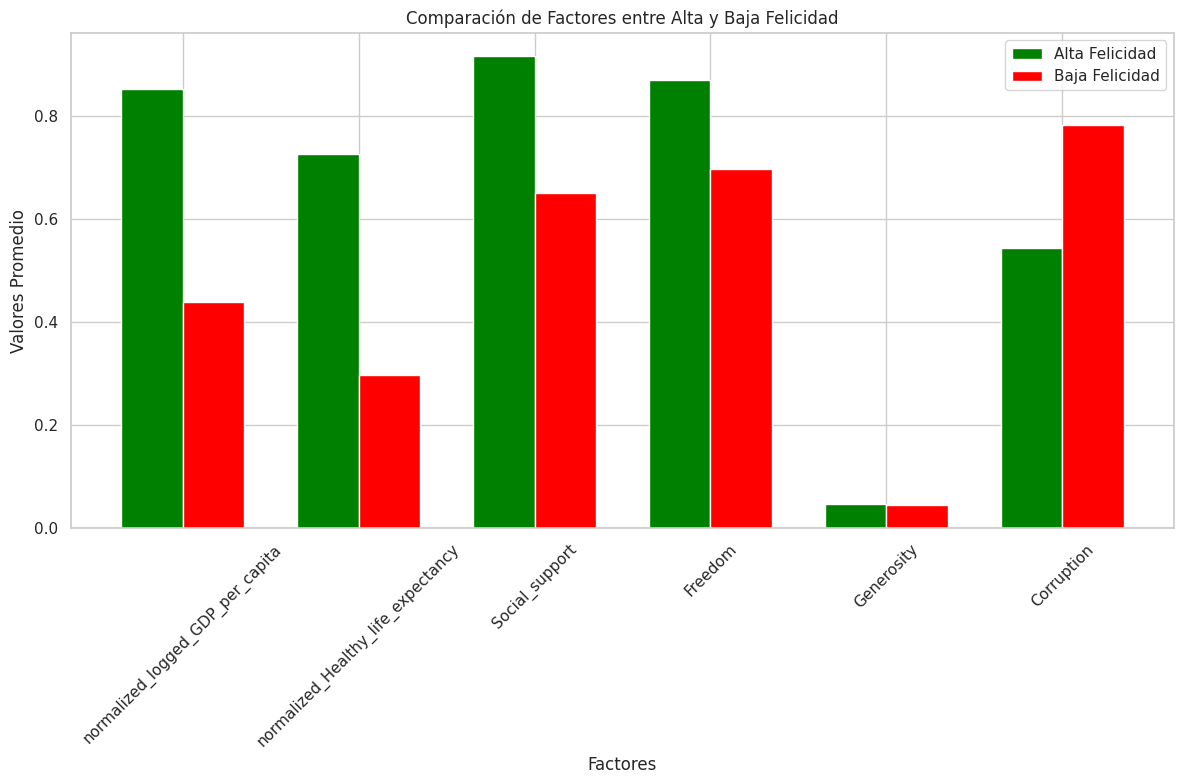

In [ ]:
# Crear el gráfico de barras

# Configuración para las barras lado a lado
n_factors = len(factors)
bar_width = 0.35
index = np.arange(n_factors)

# Crear el gráfico de barras lado a lado
fig, ax = plt.subplots(figsize=(12, 8))

bar1 = ax.bar(x=index, height=comparison_df['Alta Felicidad'], width=bar_width, label='Alta Felicidad', color='green')
bar2 = ax.bar(x=index + bar_width, height=comparison_df['Baja Felicidad'], width=bar_width, label='Baja Felicidad', color='red')

# Etiquetas y título
ax.set_xlabel('Factores')
ax.set_ylabel('Valores Promedio')
ax.set_title('Comparación de Factores entre Alta y Baja Felicidad')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(factors, rotation=45)
ax.axhline(0, color='black', linewidth=0.8)

# Añadir leyenda
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Los países con alta felicidad tienen mayor PIB, soporte social, espeanza de vida, y libertad y percepción de la corrupción